<a href="https://colab.research.google.com/github/paurbano/aplicaciones-financieras/blob/main/Rendimiento_de_un_Activo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script para calcular el rendimiento de una activo financiero
## Basado en las clases del profesor Gerardo Hérnandez del Valle - Aplicaciones Financieras ML -Colegio Bourbaki



In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 4.8 MB/s 
     |████████████████████████████████| 63 kB 500 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# as per our convenience we can modify
startDate = datetime.datetime(2021, 1, 31)
endDate = datetime.datetime(2022, 2, 28)
ticker = 'BA'

GetTickerInformation = yf.Ticker(ticker)
asset = GetTickerInformation.history(start=startDate, end=endDate)

In [ ]:
asset.drop(columns=['Dividends','Stock Splits'], inplace=True)
# rendimiento según el precio de apertura o cierre, según el gusto para analizar!!
#asset['Rendimiento'] = (asset.Open / asset.Open.shift(1)) - 1
asset['Rendimiento'] = (asset.Close / asset.Close.shift(1)) - 1

In [ ]:
asset

,Open,High,Low,Close,Volume,Rendimiento
Date,,,,,,
2021-02-01,196.000000,197.380005,192.860001,195.839996,9061900,NaN
2021-02-02,198.979996,203.029999,198.089996,200.940002,11130600,0.026042
2021-02-03,202.000000,208.160004,201.259995,207.389999,11836900,0.032099
2021-02-04,209.869995,212.479996,208.020004,210.639999,11869900,0.015671
2021-02-05,212.250000,213.199997,206.660004,207.929993,9546100,-0.012866
...,...,...,...,...,...,...
2022-02-18,212.559998,214.729996,208.600006,209.029999,6973600,-0.021304
2022-02-22,205.000000,206.899994,197.820007,198.740005,10382100,-0.049227
2022-02-23,201.130005,203.250000,195.910004,196.419998,7326300,-0.011674


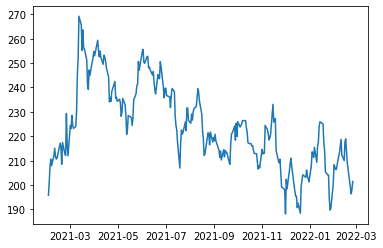

In [ ]:
plt.plot(asset.Close)
plt.show()

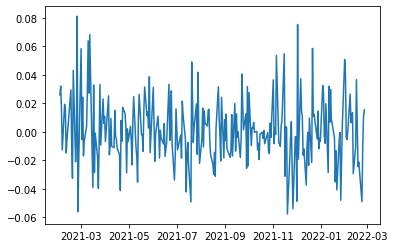

In [ ]:
plt.plot(asset.Rendimiento)
plt.show()

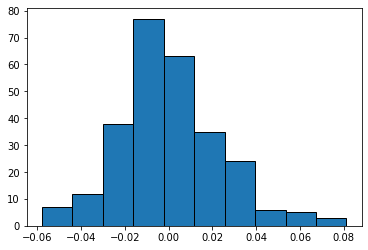

In [ ]:
plt.hist(asset.Rendimiento, edgecolor='black')
plt.show()

In [ ]:
RendimientoEsperadoDiario = asset.Rendimiento.mean()
volatilidadDiaria = asset.Rendimiento.std()

print("Rendimiento Esperado Diario = {:.2%}".format(RendimientoEsperadoDiario))
print("Volatilidad Diaria = {:.2%}".format(volatilidadDiaria))

Rendimiento Esperado Diario = 0.04%
Volatilidad Diaria = 2.29%


In [ ]:
# Anualizando
RendimientoAnualizado = RendimientoEsperadoDiario * 252
VolatilidadAnualizada = volatilidadDiaria * np.sqrt(252)
print("Rendimiento Esperado Anual = {:.2%}".format(RendimientoAnualizado))
print("Volatilidad Anual = {:.2%}".format(VolatilidadAnualizada))

Rendimiento Esperado Anual = 9.20%
Volatilidad Anual = 36.39%


In [ ]:
# curva Gaussiana
# Regla 66-95-99
print("66% \t{:.2%}\t{:.2%}\t{:.2%}".format(RendimientoAnualizado-VolatilidadAnualizada,RendimientoAnualizado,RendimientoAnualizado+VolatilidadAnualizada))
print("95% \t{:.2%}\t{:.2%}\t{:.2%}".format(RendimientoAnualizado-2*VolatilidadAnualizada,RendimientoAnualizado,RendimientoAnualizado+2*VolatilidadAnualizada))
print("99% \t{:.2%}\t{:.2%}\t{:.2%}".format(RendimientoAnualizado-3*VolatilidadAnualizada,RendimientoAnualizado,RendimientoAnualizado+3*VolatilidadAnualizada))


66% 	-27.19%	9.20%	45.60%
95% 	-63.58%	9.20%	81.99%
99% 	-99.97%	9.20%	118.38%
